## Exercise 3 "Regularization" on Oct 5th, 2022

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/jiawei/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Load MNIST dataset

(28, 28)
Size of train data: 60000, Size of test data: 10000


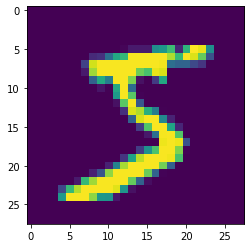

In [2]:
# loads the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# plots a single digit from the data
plt.imshow(train_data[0])
print(train_data[0].shape)
print(f"Size of train data: {train_data.shape[0]}, Size of test data: {test_data.shape[0]}")
# Reshapes the data to work in an feed forward network (FFN)
train_data = train_data.reshape((train_data.shape[0], train_data[0].shape[0]*train_data[0].shape[1]))
test_data = test_data.reshape((test_data.shape[0], test_data[0].shape[0]*test_data[0].shape[1]))
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

### Tasks for the exercise today
1. Create an identical model, this time adding some regularization and using the Functional API. Can you increase the accuracy of the model?
2. Try adding dropout between some layer, where do you find this has the highest impact?
3. How does L1 compare to L2 regularization?
4. Vary the number of units, the amount of layers, activation fucntions etc, to obtain the best accuracy you can.

#### Task1

Create an identical model, this time adding some regularization and using the Functional API. Can you increase the accuracy of the model?

In [12]:
# import the functional API instead of "Sequential" model, which is applicable to more cases
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### Model using L1 regularization

In [26]:
inputs = Input(shape=(train_data[0].shape[0], )) # shape=(784, batch_size)
# Add two dense layers to the NN model ($x as a variable representing non-input and non-output layers)
# Add a dense layer with 64 output nodes with $inputs as the input layer
x = Dense(units=64, activation='relu', kernel_regularizer=l1(1*1e-3))(inputs) 
x = Dense(units=64, activation='relu', kernel_regularizer=l1(1*1e-3))(x)
output = Dense(units=10, activation='softmax')(x)
# input tensor, output tensor
model_l1 = Model(inputs, output) 
# Compile the L1 model
model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l1.fit(train_data, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 3.5155 - accuracy: 0.7988
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 1.6014 - accuracy: 0.8923
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 1.1566 - accuracy: 0.9181
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.8537 - accuracy: 0.9293
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.6706 - accuracy: 0.9325
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5527 - accuracy: 0.9392
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4673 - accuracy: 0.9432
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4278 - accuracy: 0.9453
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3849 - accuracy: 0.9495
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3649 - accuracy: 0.9521

#### Model using L2 regularization (regularization rate is ten times of L1 regularization)

In [25]:
inputs = Input(shape=(train_data[0].shape[0], )) # shape=(784, batch_size)
# Add two dense layers to the NN model ($x as a variable representing non-input and non-output layers)
# Add a dense layer with 64 output nodes with $inputs as the input layer
x = Dense(units=64, activation='relu', kernel_regularizer=l2(1e-2))(inputs) 
x = Dense(units=64, activation='relu', kernel_regularizer=l2(1e-2))(x)
output = Dense(units=10, activation='softmax')(x)
# input tensor, output tensor
model_l2 = Model(inputs, output) 
# Compile the L2 model
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l2.fit(train_data, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 3.6518 - accuracy: 0.8404
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 1.2996 - accuracy: 0.9170
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.8284 - accuracy: 0.9374
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5853 - accuracy: 0.9431
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4292 - accuracy: 0.9489
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3425 - accuracy: 0.9513
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2982 - accuracy: 0.9541
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2768 - accuracy: 0.9543
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2582 - accuracy: 0.9563
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2516 - accuracy: 0.9566

#### Model using L1_L2 regularization 

In [24]:
inputs = Input(shape=(train_data[0].shape[0], )) # shape=(784, batch_size)
# Add two dense layers to the NN model ($x as a variable representing non-input and non-output layers)
# Add a dense layer with 64 output nodes with $inputs as the input layer
x = Dense(units=64, activation='relu', kernel_regularizer=l1_l2(1e-3, 1e-2))(inputs) 
x = Dense(units=64, activation='relu', kernel_regularizer=l1_l2(1e-3, 1e-2))(x)
output = Dense(units=10, activation='softmax')(x)
# input tensor, output tensor
model_l1_l2 = Model(inputs, output) 
# Compile the L2 model
model_l1_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l1_l2.fit(train_data, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 4.8407 - accuracy: 0.8347
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 2.0363 - accuracy: 0.9105
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 1.2134 - accuracy: 0.9319
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7544 - accuracy: 0.9399
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5270 - accuracy: 0.9433
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4336 - accuracy: 0.9456
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3979 - accuracy: 0.9452
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3844 - accuracy: 0.9475
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3706 - accuracy: 0.9484
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3819 - accuracy: 0.9488

#### We could draw the conclusion that L2 regularization performs the best regarding training accuracy, whereas L1_l2 performs the worst training accuracy

#### Task2

Try adding dropout between some layer, where do you find this has the highest impact?

In [27]:
from keras.layers import Dropout

In [61]:
# testing a dropout rate at 0.8 for the input layer for the L1 model
inputs = Input(shape=(train_data[0].shape[0], )) # shape=(784, batch_size)
# Add two dense layers to the NN model ($x as a variable representing non-input and non-output layers)
# Add a dense layer with 64 output nodes with $inputs as the input layer
x = Dropout(rate=0.8)(inputs)
x = Dense(units=64, activation='relu', kernel_regularizer=l1(1e-3))(inputs) 
x = Dense(units=64, activation='relu', kernel_regularizer=l1(1e-3))(x)
output = Dense(units=10, activation='softmax')(x)
# input tensor, output tensor
model_dropout = Model(inputs, output) 
# Compile the L2 model
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dropout.fit(train_data, train_labels, epochs=10, batch_size=64, verbose=0)
acc_l1_dropout80 = round(model_dropout.evaluate(test_data, test_labels, verbose=0)[1]*100, 2)
print(f"Accuracy of the L1 regularization model with 80% dropout at the input layer: {acc_l1_dropout80}%")

Accuracy of the L1 regularization model with 80% dropout at the input layer: 95.33%


#### Task3

How does L1 compare to L2 regularization?

In [56]:
acc_l1 = round(model_l1.evaluate(test_data, test_labels, verbose=0)[1]*100, 2)
acc_l2 = round(model_l2.evaluate(test_data, test_labels, verbose=0)[1]*100, 2)
acc_l1_l2 = round(model_l1_l2.evaluate(test_data, test_labels, verbose=0)[1]*100, 2)

model_acc_dict = {"L1": acc_l1, "L2": acc_l2, "L3": acc_l1_l2}
print(model_acc_dict)
print(f"The best model is: {[k for k, v in model_acc_dict.items() if v==max(model_acc_dict.values())][0]}")

{'L1': 95.47, 'L2': 94.61, 'L3': 94.65}
The best model is: L1


#### Task4

Vary the number of units, the amount of layers, activation fucntions etc, to obtain the best accuracy you can.

In [66]:
candidate_hidden_layer_units: tuple = (16, 32, 64, 128)
candidate_num_hidden_layers: range = range(2, 6) # try 2-5 hidden layers
candidate_act_funcs: tuple = ("relu", "sigmoid", "tanh")

max_acc: float = 0
best_params: dict = {"dense_layer_units": None, "num_dense_layers": None, "activation_function": None}

# set all candidate neural networks to have L1 regularization
for unit in candidate_hidden_layer_units:
    for act_func in candidate_act_funcs:
        for num_layers in candidate_num_hidden_layers:
            inputs = Input(shape=(train_data[0].shape[0], )) # shape=(784, batch_size)
            x = Dense(units=unit, activation=act_func, kernel_regularizer=l1(1e-3))(inputs)
            hidden_layer_count: int = 1
            while hidden_layer_count < num_layers:
                x = Dense(units=unit, activation=act_func, kernel_regularizer=l1(1e-3))(x)
                hidden_layer_count+=1
            output = Dense(units=10, activation='softmax')(x)
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(train_data, train_labels, epochs=10, batch_size=64, verbose=0)
            acc = model.evaluate(test_data, test_labels, verbose=0)[1]
            print(acc*100)
            if acc > max_acc: 
                max_acc = acc
                best_params["dense_layer_units"] = unit
                best_params["num_dense_layers"] = num_layers
                best_params["activation_function"] = act_func

print(f"Best accuracy: {round(max_acc, 4)*100}, Best params: {best_params}")

96.32999897003174
96.85999751091003
96.78000211715698
96.5499997138977
96.7199981212616
96.74000144004822
96.79999947547913
96.31999731063843
96.61999940872192
96.03999853134155
96.56999707221985
96.70000076293945
96.78999781608582
96.35999798774719
96.85999751091003
96.42000198364258
96.60000205039978
96.28000259399414
96.64000272750854
96.56999707221985
96.59000039100647
96.34000062942505
96.4900016784668
96.70000076293945
96.5499997138977
96.43999934196472
96.10999822616577
96.25999927520752
96.10000252723694
96.10000252723694
95.74000239372253
95.660001039505
96.20000123977661
95.16000151634216
95.99000215530396
95.8400011062622
95.59000134468079
96.29999995231628
94.9500024318695
95.80000042915344
95.49000263214111
95.57999968528748
95.27999758720398
95.20000219345093
95.09000182151794
95.67999839782715
95.49999833106995
95.49000263214111
Best accuracy: 96.86, Best params: {'dense_layer_units': 16, 'num_dense_layers': 3, 'activation_function': 'relu'}
